* Boston housing dataset 에서 TAX와 상관관계가 높은 변수 3개를 고르시오.
* 위에서 고른 3개를 설명변수로 두고 평균 반응식을 구하시오.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df = df.dropna(axis=0,how='any',inplace=False)


In [29]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


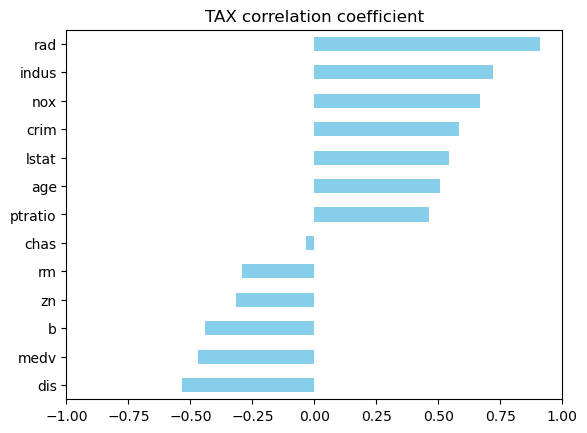

In [26]:
corr = df.corr()
target_corr = corr['tax'].sort_values(ascending=False)

target_corr.drop("tax").sort_values().plot(kind='barh',color='skyblue')
plt.xlim(-1,1)
plt.title("TAX correlation coefficient")
plt.show()


* 절댓값이 가장 큰 rad indus nox 선택

In [35]:
import statsmodels.api as sm 

x = sm.add_constant(df[['rad','indus','nox']])
y = df['tax']
model = sm.OLS(y,x).fit()

reg_coef = model.params
print('-------regression coefficients--------')
print(reg_coef)

-------regression coefficients--------
const    193.640583
rad       14.416641
indus      6.785717
nox        2.443092
dtype: float64
14.416640844055305


In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tax   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1206.
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          5.72e-229
Time:                        14:22:20   Log-Likelihood:                -2779.2
No. Observations:                 506   AIC:                             5566.
Df Residuals:                     502   BIC:                             5583.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        193.6406     15.818     12.241      0.0

In [44]:
const, rad, indus, nox = reg_coef.round(2)
print(f"평균 반응식 : TAX = {const} + {rad}RAD + {indus}INDUS + {nox}NOX")

평균 반응식 : TAX = 193.64 + 14.42RAD + 6.79INDUS + 2.44NOX
